# Spark foundation :Data science and business analytics internship

### Spark foundation task 2
### V Yeshwanth 

### Importing neccesary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df.set_index('Id',inplace = True)

In [5]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Basic EDA

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


<AxesSubplot:>

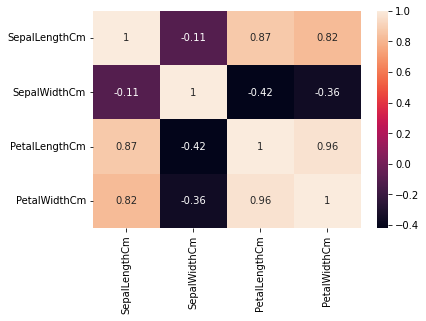

In [12]:
sns.heatmap(df.corr(),annot = True)

In [13]:
## EDA

<AxesSubplot:xlabel='Species'>

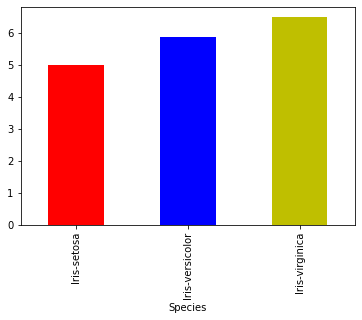

In [14]:
df.groupby('Species')['SepalLengthCm'].median().plot.bar(color = ['r','b','y'])

<AxesSubplot:xlabel='Species'>

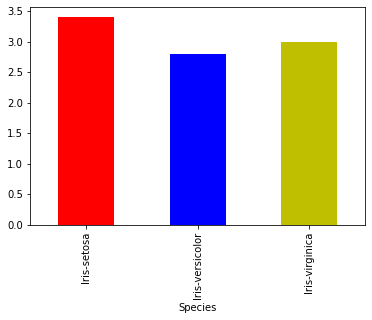

In [15]:
df.groupby('Species')['SepalWidthCm'].median().plot.bar(color = ['r','b','y'])

<AxesSubplot:xlabel='Species'>

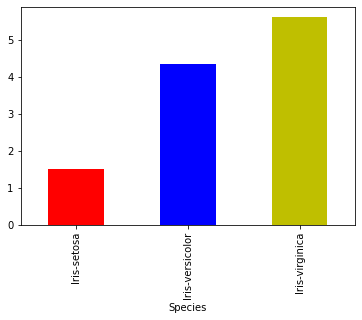

In [16]:
df.groupby('Species')['PetalLengthCm'].median().plot.bar(color = ['r','b','y'])

<AxesSubplot:xlabel='Species'>

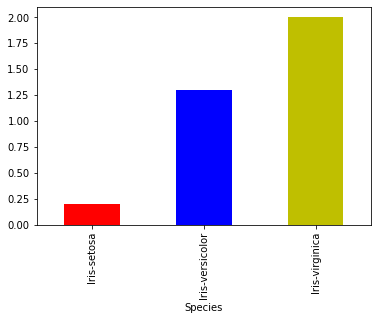

In [17]:
df.groupby('Species')['PetalWidthCm'].median().plot.bar(color = ['r','b','y'])

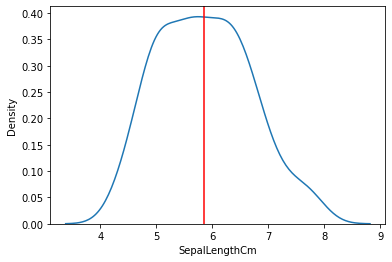

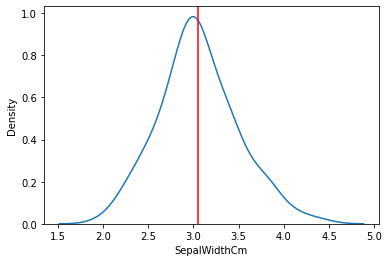

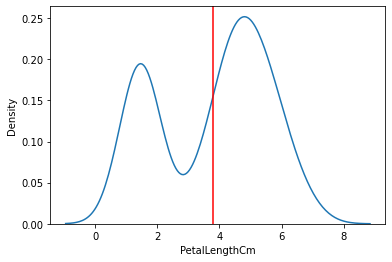

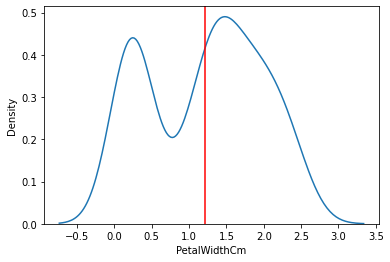

In [18]:
for  i in df.columns:
    if df[i].dtype != 'O':
        sns.kdeplot(df[i])
        plt.axvline(df[i].mean(),color = 'red')
        plt.show()

In [19]:
## importing libraries
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier


In [20]:
encode = LabelEncoder()
df['Species'] = encode.fit_transform(df['Species'])

In [21]:
y = df['Species']

In [22]:
x = df[[i for i in df.columns if i!='Species']]

In [23]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
...,...,...,...,...
146,6.7,3.0,5.2,2.3
147,6.3,2.5,5.0,1.9
148,6.5,3.0,5.2,2.0


In [24]:
# Train test split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 10)

### Fitting decision tree model setting maximum depth = 5 for creating a generalized model and not overfitting the data

In [32]:
clf = DecisionTreeClassifier(max_depth = 5)

In [33]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [34]:
clf.score(x_test,y_test)

0.9387755102040817

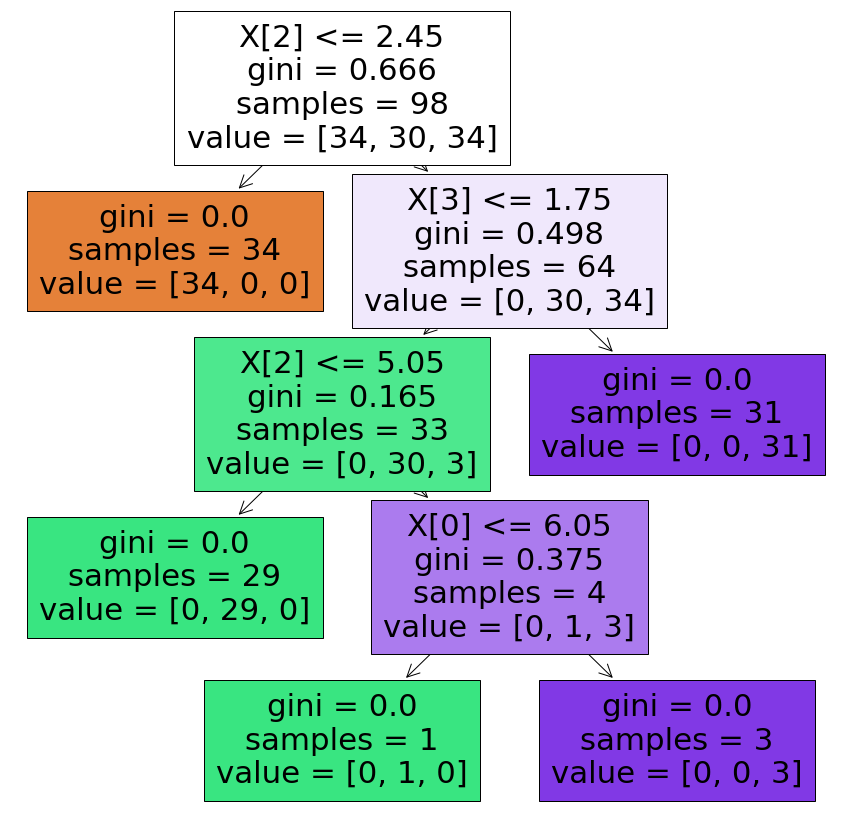

In [35]:
plt.figure(figsize = (15,15))
tree.plot_tree(clf,filled = True)
plt.show()